This is the code for building the file system

This code assumes you have the following file pytorchproject_final/ISIC_2019_Training_GroundTruth.csv

and that all the images are in a file

Note this only puts all the data into correct folders in the train folder

You will need to manually seperate the train and validation folders

In [ ]:
import pandas as pd

In [ ]:
# Load the ground truth which also has the image
# These are the two most import
data = pd.read_csv('pytorchproject_final/ISIC_2019_Training_GroundTruth.csv')

In [ ]:
# First few
data.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Descriptive statistics
data.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
# Display counts of each category
data.sum()

image    ISIC_0000000ISIC_0000001ISIC_0000002ISIC_00000...
MEL                                                 4522.0
NV                                                 12875.0
BCC                                                 3323.0
AK                                                   867.0
BKL                                                 2624.0
DF                                                   239.0
VASC                                                 253.0
SCC                                                  628.0
UNK                                                    0.0
dtype: object

In [ ]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [ ]:
# UNK was part of the original 2019 competition. The test data contained data from an unknown class.
# Since testing data isnt available we will just drop this.

data = data.drop('UNK', axis=1)

In [ ]:
# Want to work only with the dummies for a minute
data_dummies = data.drop('image', axis=1)

In [ ]:
# One hot encode

# https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas

data['value'] = pd.from_dummies(data_dummies)

In [ ]:
# Drop the original columns
data = data.drop(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'], axis=1)

In [ ]:
# Replace the categories with numeric values
# https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/

data['value'].replace(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
                        [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

C:\Users\A\AppData\Local\Temp\ipykernel_3964\2166004711.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['value'].replace(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
C:\Users\A\AppData\Local\Temp\ipykernel_3964\2166004711.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['

In [ ]:
data.value.value_counts()

value
1    12875
0     4522
2     3323
4     2624
3      867
7      628
6      253
5      239
Name: count, dtype: int64

In [ ]:
data.head()

,image,value
0,ISIC_0000000,1
1,ISIC_0000001,1
2,ISIC_0000002,0
3,ISIC_0000003,1
4,ISIC_0000004,0


In [ ]:
# Info about creating folders
# https://www.geeksforgeeks.org/create-a-directory-in-python/
# Create folders for the data
import os

os.mkdir('./pytorchproject_final/train/')
os.mkdir('./pytorchproject_final/val/')
os.mkdir('./pytorchproject_final/test/')

In [ ]:
# Inside the train folder create folders for 0,1,2,3,4,5,6,7 our labels
# https://www.geeksforgeeks.org/create-a-directory-in-python/
# Create folders for the data

for i in [0, 1, 2, 3, 4, 5, 6, 7]:

    os.mkdir('./pytorchproject_final/train/' + str(i))

In [ ]:
# Make similar files in our val folder
# https://www.geeksforgeeks.org/create-a-directory-in-python/
# Create folders for the data

for i in [0, 1, 2, 3, 4, 5, 6, 7]:

    os.mkdir('./pytorchproject_final/val/' + str(i))

In [ ]:
# Make similar files in our test folder
# https://www.geeksforgeeks.org/create-a-directory-in-python/
# Create folders for the data

for i in [0, 1, 2, 3, 4, 5, 6, 7]:

    os.mkdir('./pytorchproject_final/test/' + str(i))

In [ ]:
# Move all the images from the original destination to the folder of their label

# Info about moving file
# https://stackoverflow.com/questions/8858008/how-do-i-move-a-file-in-python

import shutil

for i in range(len(data)):

    #print(data.iloc[i][0])
    #print(data.iloc[i][1])

    try:
        if (data.iloc[i][1] == 0):

            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/0/" + str(i)+ ".jpg")

        elif (data.iloc[i][1] == 1):
            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/1/" + str(i)+ ".jpg")

        elif (data.iloc[i][1] == 2):
            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/2/" + str(i)+ ".jpg")

        elif (data.iloc[i][1] == 3):
            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/3/" + str(i)+ ".jpg")

        elif (data.iloc[i][1] == 4):
            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/4/" + str(i)+ ".jpg")

        elif (data.iloc[i][1] == 5):
            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/5/" + str(i)+ ".jpg")

        elif (data.iloc[i][1] == 6):
            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/6/" + str(i)+ ".jpg")

        elif (data.iloc[i][1] == 7):
            shutil.move("./pytorchproject_final/ISIC_2019_Training_Input/ISIC_2019_Training_Input/" + str(data.iloc[i][0]) + ".jpg", "./pytorchproject_final/train/7/" + str(i)+ ".jpg")

    except:

        print(i)

C:\Users\A\AppData\Local\Temp\ipykernel_3964\3893863550.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data.iloc[i][1] == 0):
C:\Users\A\AppData\Local\Temp\ipykernel_3964\3893863550.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (data.iloc[i][1] == 1):
C:\Users\A\AppData\Local\Temp\ipykernel_3964\3893863550.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shutil.move("./pytorchproject_final/ISIC_2019_Trainin

In [ ]:
# Load dataset

# Info about ImageFolder
# https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

# Example use from
# https://www.kaggle.com/code/leifuer/intro-to-pytorch-loading-image-data

import torch
from torchvision import datasets, transforms

datasets.ImageFolder('./pytorchproject_final/train/')

Dataset ImageFolder
    Number of datapoints: 25331
    Root location: ./pytorchproject_final/train/

This is the code for image augmentation.

It assumes the training images are saved in the path ./pytorchproject_only1024_v2/train/

And are already sorted into files for each class, i.e 0,1,2,3,4,5,6,7

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import v2

# Info about augmentation https://pytorch.org/vision/main/transforms.html
transforms = v2.Compose([
    v2.RandomHorizontalFlip(0.5),
    v2.RandomVerticalFlip(0.5),
    v2.RandomApply(transforms=[v2.RandomAdjustSharpness(sharpness_factor=2)], p=0.5),
    v2.RandomApply(transforms=[v2.RandAugment()], p=0.5),
    v2.RandomApply(transforms=[v2.RandomRotation(degrees=(0, 360))], p=0.6),
    v2.RandomApply(transforms=[v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))], p=0.5),

])

In [ ]:
# Load the unaugmented training set
dataset = datasets.ImageFolder('./pytorchproject_only1024_v2/train/', transform=v2.ToImage())

In [ ]:
# Print info about the dataset
dataset

Dataset ImageFolder
    Number of datapoints: 3460
    Root location: ./pytorchproject_only1024_v2/train/
    StandardTransform
Transform: ToImage()

In [ ]:
#https://stackoverflow.com/questions/35286540/how-to-display-an-image
%matplotlib inline
import matplotlib.pyplot as plt

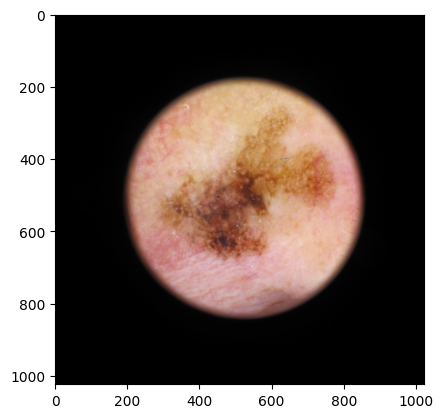

In [ ]:
# Plot an image in the dataset
plt.imshow(dataset[3][0].T)

In [ ]:
# Save it as original image
original_image = dataset[3][0]

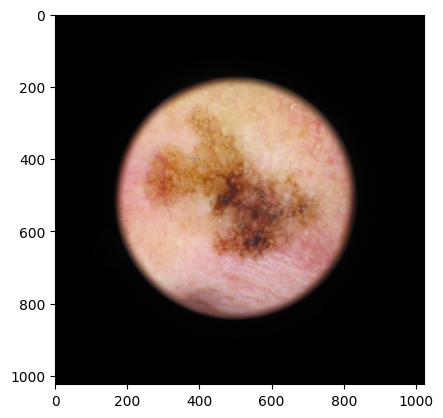

In [ ]:
# Plot the transformed image
plt.imshow(transforms(original_image).T)

In [ ]:
# Transform the original again
augmented_image = transforms(original_image)

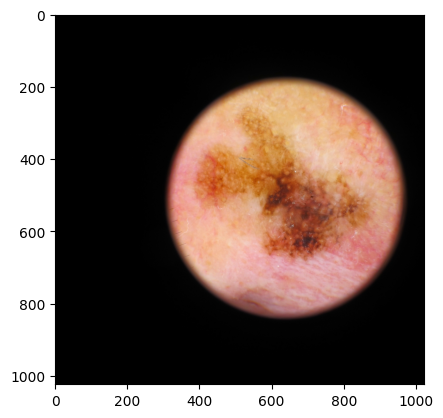

In [ ]:
# Plot the transformed image
plt.imshow(augmented_image.T)

In [ ]:
from torchvision.utils import save_image

In [ ]:
# https://pytorch.org/vision/main/generated/torchvision.utils.save_image.html

# Was getting this error this fixed it RuntimeError: result type Float can't be cast to the desired output type Byte
# https://forums.fast.ai/t/save-int-tensor-0-255-as-image/97286
torchvision.utils.save_image(augmented_image/255, "test.png")

In [ ]:
# Save all the images and labels in arrays
images = []
labels = []

for image,label in dataset:
    images.append(image)
    labels.append(label)

In [ ]:
# Create arrays of images in each class
images0 = []
images1 = []
images2 = []
images3 = []
images4 = []
images5 = []
images6 = []
images7 = []

for i in range(len(labels)):

    if (labels[i] == 0):

        images0.append(images[i])

    elif (labels[i] == 1):

        images1.append(images[i])

    elif (labels[i] == 2):

        images2.append(images[i])

    elif (labels[i] == 3):

        images3.append(images[i])

    elif (labels[i] == 4):

        images4.append(images[i])

    elif (labels[i] == 5):

        images5.append(images[i])

    elif (labels[i] == 6):

        images6.append(images[i])

    elif (labels[i] == 7):

        images7.append(images[i])

In [ ]:
label_count_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}

In [ ]:
for i in labels:

    label_count_dict[i] = label_count_dict[i] + 1

In [ ]:
# Get the counts of each class in the training set
label_count_dict

{0: 640, 1: 640, 2: 640, 3: 556, 4: 640, 5: 154, 6: 163, 7: 403}

In [ ]:
# In order to balance we need to take the max and subtract the number of existing
# This gives us the number of required augmentations
required_augmentations = [640 - label_count_dict[i] for i in label_count_dict]

In [ ]:
# Display the required_augmentations
required_augmentations

[0, 0, 0, 168, 0, 560, 568, 364]

In [ ]:
# Create all the augmented images required for class 3.
# Each image in the original class is selected equally.
# Save the augmented images in the array augmented images 3
augmented_images3 = []

for i in range(required_augmentations[3]+1):

    if (i==0):
        continue

    else:

        print(i%label_count_dict[3])
        original = images3[i%label_count_dict[3]]
        #print(original)
        #plt.imshow(original.T)
        augmented_image = transforms(original)
        #plt.imshow(augmented_image.T)
        augmented_images3.append(augmented_image)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


In [ ]:
# Check that the correct amount have been created
len(augmented_images3)

168

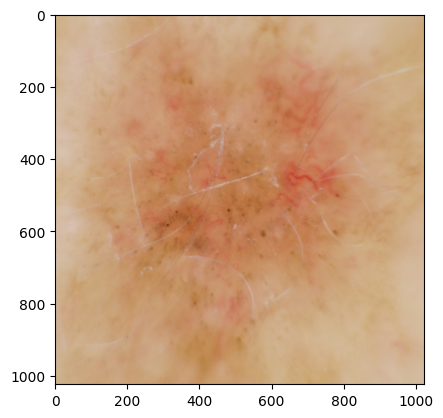

In [ ]:
# Display an image
plt.imshow(augmented_images3[10].T)

In [ ]:
# https://pytorch.org/vision/main/generated/torchvision.utils.save_image.html

# Was getting this error this fixed it RuntimeError: result type Float can't be cast to the desired output type Byte
# https://forums.fast.ai/t/save-int-tensor-0-255-as-image/97286
# Save the augmented images in the correct folder

for i in range(len(augmented_images3)):

    name = 'augmented_images3_' + str(i) + ".jpg"
    torchvision.utils.save_image(augmented_images3[i]/255, "pytorchproject_only1024_v2/train/3/" + name)


In [ ]:
# Create the augmented images for class 5

augmented_images5 = []

for i in range(required_augmentations[5]+1):

    if (i==0):
        continue

    else:

        print(i%label_count_dict[5])
        original = images5[i%label_count_dict[5]]
        #print(original)
        #plt.imshow(original.T)
        augmented_image = transforms(original)
        #plt.imshow(augmented_image.T)
        augmented_images5.append(augmented_image)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30

In [ ]:
# Check it created the correct amount
len(augmented_images5)

560

In [ ]:
#https://pytorch.org/vision/main/generated/torchvision.utils.save_image.html

# Was getting this error this fixed it RuntimeError: result type Float can't be cast to the desired output type Byte
# https://forums.fast.ai/t/save-int-tensor-0-255-as-image/97286
# Save the augmented images in the correct folder

for i in range(len(augmented_images5)):

    name = 'augmented_images5_' + str(i) + ".jpg"
    torchvision.utils.save_image(augmented_images5[i]/255, "pytorchproject_only1024_v2/train/5/" + name)

In [ ]:
# Create augmented images for class 6
augmented_images6 = []

for i in range(required_augmentations[6]+1):

    if (i==0):
        continue

    else:

        print(i%label_count_dict[6])
        original = images6[i%label_count_dict[6]]
        #print(original)
        #plt.imshow(original.T)
        augmented_image = transforms(original)
        #plt.imshow(augmented_image.T)
        augmented_images6.append(augmented_image)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62

In [ ]:
len(augmented_images6)

568

In [ ]:
# https://pytorch.org/vision/main/generated/torchvision.utils.save_image.html

# Was getting this error this fixed it RuntimeError: result type Float can't be cast to the desired output type Byte
# https://forums.fast.ai/t/save-int-tensor-0-255-as-image/97286
# Save the augmented images in the correct folder

for i in range(len(augmented_images6)):

    name = 'augmented_images6_' + str(i) + ".jpg"
    torchvision.utils.save_image(augmented_images6[i]/255, "pytorchproject_only1024_v2/train/6/" + name)

In [ ]:
# Created augmented images for class 7
augmented_images7 = []

for i in range(required_augmentations[7]+1):

    if (i==0):
        continue

    else:

        print(i%label_count_dict[7])
        original = images7[i%label_count_dict[7]]
        #print(original)
        #plt.imshow(original.T)
        augmented_image = transforms(original)
        #plt.imshow(augmented_image.T)
        augmented_images7.append(augmented_image)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
0
1
2
3


In [ ]:
len(augmented_images7)

364

In [ ]:
# https://pytorch.org/vision/main/generated/torchvision.utils.save_image.html

# Was getting this error this fixed it RuntimeError: result type Float can't be cast to the desired output type Byte
# https://forums.fast.ai/t/save-int-tensor-0-255-as-image/97286
# Save the augmented images in the correct folder

for i in range(len(augmented_images7)):

    name = 'augmented_images7_' + str(i) + ".jpg"
    torchvision.utils.save_image(augmented_images7[i]/255, "pytorchproject_only1024_v2/train/7/" + name)

This is the code for running the model and hyper parameter tuning

In [ ]:
# These imports are from various sources
# From wherever I borrowed things or things where amalgamated from

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.optim import lr_scheduler
from tqdm import tqdm
from tempfile import TemporaryDirectory
import os
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

In [ ]:
# https://pytorch.org/vision/stable/models.html

from torchvision.models import inception_v3, Inception_V3_Weights

# Initialize the Weight Transforms
weights = Inception_V3_Weights.DEFAULT
preprocess = weights.transforms()

# Apply it to the input image
#img_transformed = preprocess(img)

In [ ]:
# Info about printing these from
# https://www.learnpytorch.io/06_pytorch_transfer_learning/
preprocess

ImageClassification(
    crop_size=[299]
    resize_size=[342]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
random_seed = 42

torch.manual_seed(random_seed)

# Was getting an error later on that the image was a pil so transformed it to tensor

# Then was getting an error that the sizes of the images where different so resized them
# Info about this from:
# https://discuss.pytorch.org/t/runtimeerror-stack-expects-each-tensor-to-be-equal-size-but-got-3-224-224-at-entry-0-and-3-224-336-at-entry-3/87211

trainset = datasets.ImageFolder('./pytorchproject_only1024_v2/train/', transform=preprocess)
valset = datasets.ImageFolder('./pytorchproject_only1024_v2/val/', transform=preprocess)
testset = datasets.ImageFolder('./pytorchproject_only1024_v2/test/', transform=preprocess)


In [ ]:
# Thank you so much to the transfer learning tutorial.
# A lot of what is in here is courtesy of that lesson
# Specifically

# Also added the scheduler
# And saving the best params
# And reloading the best weights at the end


def train_model(model, criterion, optimizer, scheduler, num_epochs=20):

  # Courtesy of transfer learning tutorial
  # Create a temporary directory to save training checkpoints
  with TemporaryDirectory() as tempdir:

      best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

      torch.save(model.state_dict(), best_model_params_path)
      best_acc = 0.0


      # ------------------------------- Part 10---------------------------------------
      # Lists for loss and accuracy to plot later
      train_losses = []
      train_accuracy = []
      val_losses = []
      val_accuracy = []

      # Train the model - write the training loop
      '''
      in the loop you need to keep track of training and validation accuracy.
      Print the training & validation loss & accuracy after every epoch.

      Remember when you evaluate the model on val or test set, set the model to eval
      mode, and trun off graients requirement. Once you're done, set the model back to
      train mode
      '''
      for epoch in range(num_epochs):  # loop over the dataset multiple times

          # Training Cycle #

          running_loss = 0.0
          correct = 0
          total = 0

          # set the model back to train mode
          model.train()

          for i, data in enumerate(trainloader, 0):

              # get the inputs; data is a list of [inputs, labels]
              inputs, labels =  data

              #inputs = preprocess(inputs)

              # https://stackoverflow.com/questions/59013109/runtimeerror-input-type-torch-floattensor-and-weight-type-torch-cuda-floatte
              # Was getting an error need to put the data on the GPU
              inputs, labels = inputs.to(device), labels.to(device)

              # zero the parameter gradients
              # Courtesy MNIST_CNN (2).ipynb
              optimizer.zero_grad()

              # forward + backward + optimize

              # Courtesy transfer_learning_tutorial.ipynb
              # Calculate the predictions
              outputs = model(inputs)
              _, preds = torch.max(outputs, 1)

              # Calculate the loss
              loss = criterion(outputs, labels)

              # Back propagation
              loss.backward()

              # One optiimization step
              optimizer.step()


              # calculate training accuracy

              # Courtesy transfer_learning_tutorial.ipynb
              # Keep track of the runnin loss, correct, and total
              # inputs.size(0) is the batch size

              running_loss += loss.item() * inputs.size(0)

              correct += torch.sum(preds == labels.data)

              total += inputs.size(0)


          training_accuracy = correct/total

          training_loss = running_loss / total

          train_losses.append(training_loss)
          train_accuracy.append(training_accuracy)

          print("Epoch {} Training Performance: \t\tLoss: {:.6f}\tAccuracy: {:.6f}".format(epoch, training_loss, training_accuracy))

          # END OF TRAINING #

          # START OF VALIDATION #

          # From transfer learning tutorial
          # At end of training take one step
          scheduler.step()

          # Validation at the end of the epoch
          # set mode to eval mode & tell torch no gradients are required.
          model.eval()

          # Courtesy MNIST_CNN (2).ipynb
          test_running_loss = 0
          test_correct = 0
          test_total = 0

          # define any valuable you need to track here <<<<<
          with torch.no_grad():

            # loop through the data and find accuracy and loss for all val data

            y_true = []
            y_pred = []

            for inputs, labels in valloader:

              # https://stackoverflow.com/questions/59013109/runtimeerror-input-type-torch-floattensor-and-weight-type-torch-cuda-floatte
              # Was getting an error need to put the data on the GPU
              inputs, labels = inputs.to(device), labels.to(device)

              # Courtesy transfer_learning_tutorial.ipynb
              outputs = model(inputs)
              _, preds = torch.max(outputs, 1)
              loss = criterion(outputs, labels)

              # No back prop or optimization step

              # Courtesy transfer_learning_tutorial.ipynb
              test_running_loss += loss.item() * inputs.size(0)
              test_correct += torch.sum(preds == labels.data)
              test_total += inputs.size(0)

              # Move labels to cpu before appending for ease of use for next two steps

              labels, preds = labels.to('cpu'), preds.to('cpu')

              # Easier to work with single labels
              for label in labels:

                  y_true.append(label)

              for pred in preds:

                  y_pred.append(pred)

          test_training_accuracy = test_correct/test_total

          ## END OF VALIDATION ##

          # Courtesy of transfer learning tutorial.
          if test_training_accuracy > best_acc:
                    best_acc = test_training_accuracy
                    torch.save(model.state_dict(), best_model_params_path)


          validation_loss = test_running_loss / test_total

          val_losses.append(validation_loss)
          val_accuracy.append(test_training_accuracy)

          f1 = f1_score(y_true, y_pred, average='weighted')

          print("Epoch {} Validation Performance: \tLoss: {:.6f}\tAccuracy: {:.6f}\tF1: {:.6f}\n".format(epoch, validation_loss, test_training_accuracy.item(),f1))

      # Courtesy of transfer learning tutorial.
      # load best model weights

      print('Loading model weights that performed best on validation')

      model.load_state_dict(torch.load(best_model_params_path))

      ## END OF TRAINING ##

      print('Finished Training')

      # Append all the stats into a neat package
      stats = []
      stats.append(train_losses)
      stats.append(train_accuracy)
      stats.append(val_losses)
      stats.append(val_accuracy)

  return model, stats

In [ ]:
# This is the basic way I hyper parameter tuned.
# There are other libraries available that may be much more efficient
batch_size = [8]
num_epochs = [20]
learning_rate = [0.0001]

# Not currently in use in the loop below
weight_decay = [0.001]


In [ ]:
for i in batch_size:
    for j in num_epochs:
        for k in learning_rate:
            for l in weight_decay:

                print("Batch Size: ", i , " Num Epochs: ", j , " Learning Rate: ", k, " Weight Decay: ", l)

                trainloader = torch.utils.data.DataLoader(trainset, batch_size=i, shuffle=True)
                valloader = torch.utils.data.DataLoader(valset, batch_size=i, shuffle=True)
                testloader = torch.utils.data.DataLoader(testset, batch_size=i)

                # Check if CUDA is available and set PyTorch to use GPU or CPU
                # Courtesy transfer_learning_tutorial.ipynb
                device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
                #print(device)

                model = models.inception_v3(weights='IMAGENET1K_V1')

                # Got error found fix here
                # https://stackoverflow.com/questions/51045839/pytorch-inceptionv3-transfer-learning-gives-error-max-received-an-invalid-co
                model.aux_logits=False

                # Courtesy transfer_learning_tutorial.ipynb
                num_ftrs = model.fc.in_features

                # Courtesy transfer_learning_tutorial.ipynb
                # Here the size of each output sample is set to 2.
                # Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
                model.fc = nn.Linear(num_ftrs, 8)

                # Courtesy transfer_learning_tutorial.ipynb
                model = model.to(device)

                # Define a loss function and optimizer -
                # Courtesy of HW2
                # Use Cross Entropy loss because 10 classes
                criterion = torch.nn.CrossEntropyLoss()
                # Use optimizer from homework 2

                # Momentum from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
                #optimizer = torch.optim.SGD(model.parameters(), lr = k, momentum=0.9, weight_decay=l)
                optimizer = torch.optim.Adam(model.parameters(), lr = k)


                # From transfer learning tutorial. They used this learning rate decay scheduler I
                # Added it to my HW3

                # Decay LR by a factor of 0.1 every 7 epochs
                exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

                # This set up is similar to the transfer learning example

                model, stats = train_model(model, criterion, optimizer, exp_lr_scheduler,
                                    num_epochs=j)

                # Courtesy HW3
                # ------------------------------- Part 11 --------------------------------------
                # Test the model on test data and get confusion matrix
                y_true = []
                y_pred = []
                with torch.no_grad():
                    for inputs, labels in testloader:

                        # https://stackoverflow.com/questions/59013109/runtimeerror-input-type-torch-floattensor-and-weight-type-torch-cuda-floatte
                        # Was getting an error need to put the data on the GPU
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Courtesy transfer_learning_tutorial.ipynb
                        # Use the model to get the outputs
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)

                        # Info about casting 1D tensor to int from https://stackoverflow.com/questions/47588682/how-to-cast-a-1-d-inttensor-to-int-in-pytorch
                        # and https://pytorch.org/docs/stable/tensors.html#torch.Tensor.item

                        # Move labels to cpu before appending for ease of use for next two steps
                        labels, preds = labels.to('cpu'), preds.to('cpu')

                        # Easier to work with single labels
                        for label in labels:

                            y_true.append(label)

                        for pred in preds:

                            y_pred.append(pred)

                # Courtesy HW3
                # -----------------------------------------------------------------------------
                # ------------------------------- Part 13---------------------------------------
                # Print F1 score

                # Courtesy of https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
                f1 = f1_score(y_true, y_pred, average='weighted')
                print('batch: ',i, ' num_epochs: ',j, ' learning rate: ',k, ' f1 score: ', f1)

Batch Size:  8  Num Epochs:  20  Learning Rate:  0.0001  Weight Decay:  0.001
Epoch 0 Training Performance: 		Loss: 1.415165	Accuracy: 0.478125
Epoch 0 Validation Performance: 	Loss: 1.246022	Accuracy: 0.541667	F1: 0.532428

Epoch 1 Training Performance: 		Loss: 0.965841	Accuracy: 0.654297
Epoch 1 Validation Performance: 	Loss: 1.232705	Accuracy: 0.554398	F1: 0.552697

Epoch 2 Training Performance: 		Loss: 0.725356	Accuracy: 0.746094
Epoch 2 Validation Performance: 	Loss: 1.287283	Accuracy: 0.561343	F1: 0.563323

Epoch 3 Training Performance: 		Loss: 0.543996	Accuracy: 0.812891
Epoch 3 Validation Performance: 	Loss: 1.212615	Accuracy: 0.622685	F1: 0.619563

Epoch 4 Training Performance: 		Loss: 0.391835	Accuracy: 0.867383
Epoch 4 Validation Performance: 	Loss: 1.245852	Accuracy: 0.607639	F1: 0.609193

Epoch 5 Training Performance: 		Loss: 0.319041	Accuracy: 0.895508
Epoch 5 Validation Performance: 	Loss: 1.249607	Accuracy: 0.635417	F1: 0.631437

Epoch 6 Training Performance: 		Loss: 0.

In [ ]:
# Move these from cuda to CPU before plotting

for i in range(len(train_acc)):

    train_acc[i] = train_acc[i].cpu()
    val_acc[i] = val_acc[i].cpu()

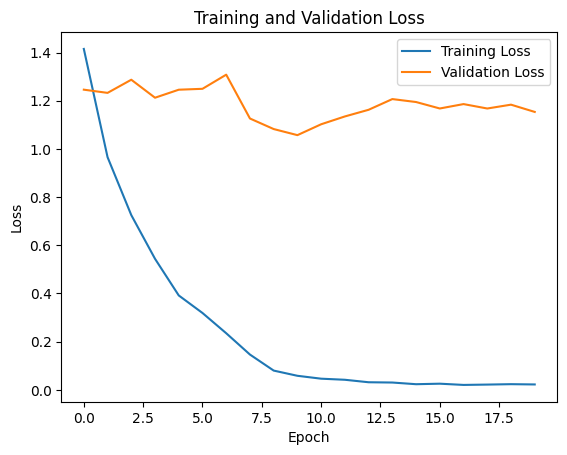

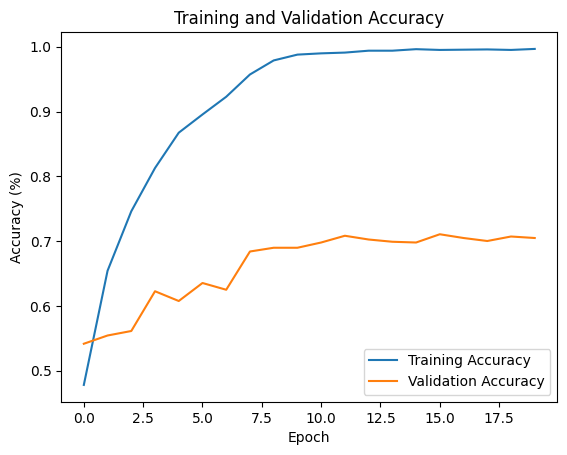

In [ ]:
# Courtesy HW3

# From course notes MNIST_CNN
import matplotlib.pyplot as plt

# ------------------------------- Plotting -------------------------------------
# Plot training loss over time

train_loss = stats[0]
train_acc = stats[1]

val_loss = stats[2]
val_acc = stats[3]


plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plot training accuracy over time
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()


In [ ]:
# Courtesy HW3
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

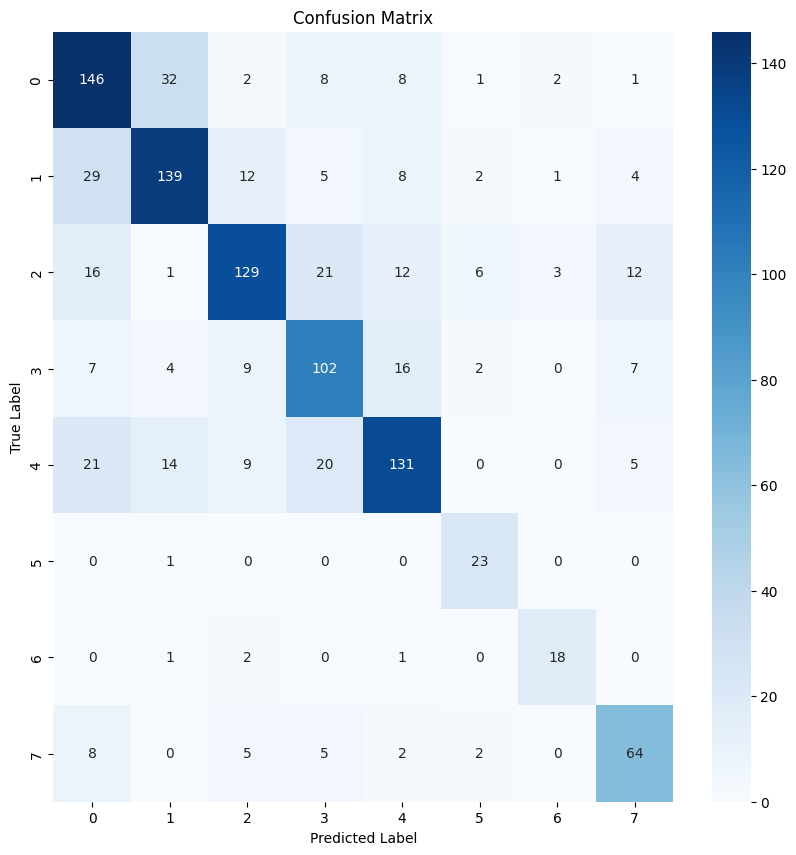

In [ ]:
# Courtesy HW3

# ------------------------------- Part 12 --------------------------------------
# Find and plot confusion matrix

# Courtesy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# -----------------------------------------------------------------------------

In [ ]:
# Courtesy HW3

# Info from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

target_names = ["0","1","2","3","4","5","6","7"]

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       200
           1       0.72      0.69      0.71       200
           2       0.77      0.65      0.70       200
           3       0.63      0.69      0.66       147
           4       0.74      0.66      0.69       200
           5       0.64      0.96      0.77        24
           6       0.75      0.82      0.78        22
           7       0.69      0.74      0.72        86

    accuracy                           0.70      1079
   macro avg       0.70      0.74      0.71      1079
weighted avg       0.70      0.70      0.70      1079

